<p>We will be taking some code from MNIST_logistic_regression project since this is almost the same project with a little more advanced methods.</p>

In [1]:
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# We only use keras in this notebook to get the data. The rest is managed low-level.
train_images = train_images/255
test_images = test_images/255

In [3]:
train_labels = train_labels[:,np.newaxis]
test_labels = test_labels[:,np.newaxis]


m = train_labels.size
train_labels

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

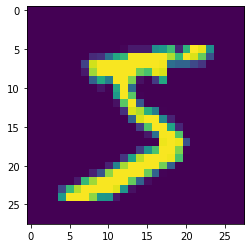

In [4]:
plt.imshow(train_images[0])
m = train_labels.size
test_size = test_labels.size
train_labels[:,0]

In [5]:
X = np.zeros(28*28*m).reshape(28*28,m)
X_test = np.zeros(28*28*test_size).reshape(28*28,test_size)

In [6]:
for i in np.arange(m):
    X[:,i] = train_images[i].reshape(28*28)
for i in np.arange(test_size):
     X_test[:,i] = test_images[i].reshape(28*28)

In [7]:
def reform_labels(y,K):
    m = y.size
    a = np.zeros(m * K)
    a = a.reshape(K,m)
    for i in np.arange(m):
        a[y[i],i] = 1
    return a

In [8]:
train_labels = reform_labels(train_labels,10)
train_labels.shape

(10, 60000)

<p>Now we have a training set with columns as our digits represented as unit vectors.</p>

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [10]:
def cost_function(y, y_hat,m):
    return  -(1/m) * np.sum(np.multiply(y, np.log(y_hat)))

<p>Now at this point we can do the backpropagation. This time we will have a hidden layer with 512 nodes.</p>

In [11]:
n_x = X.shape[0]
digits = 10
num_hidden = 512
alpha = 1

# Let us initialize the weights
theta_1 = np.random.randn(num_hidden, n_x)
bias_1 = np.zeros((num_hidden, 1))
theta_2 = np.random.randn(digits, num_hidden)
bias_2 = np.zeros((digits, 1))


for i in range(2000):
    
    # Forward Feed
    z_2 = np.matmul(theta_1,X) + bias_1
    a_2 = sigmoid(z_2)
    z_3 = np.matmul(theta_2,a_2) + bias_2
    a_3 = np.exp(z_3) / np.sum(np.exp(z_3), axis=0)
    
    # We compute the cost function
    J = cost_function(train_labels, a_3,m)
    
    # We compute the derivatives with backpropagation
    d_z_3 = a_3-train_labels
    d_theta_2 = (1./m) * np.matmul(d_z_3, a_2.T)
    d_bias_2 = (1./m) * np.sum(d_z_3, axis=1, keepdims=True)

    d_a_2 = np.matmul(theta_2.T, d_z_3)
    d_z_2 = d_a_2 * sigmoid(z_2) * (1 - sigmoid(z_2))
    d_theta_1 = (1./m) * np.matmul(d_z_2, X.T)
    d_bias_1 = (1./m) * np.sum(d_z_2, axis=1, keepdims=True)
    
    # We apply gradient descent
    theta_2 = theta_2 - alpha * d_theta_2
    bias_2 = bias_2 - alpha * d_bias_2
    theta_1 = theta_1 - alpha * d_theta_1
    bias_1 = bias_1 - alpha * d_bias_1

    print("Epoch", i, "cost: ", J)

print("Final cost:", J)

Epoch 0 cost:  22.846430947863023
Epoch 1 cost:  22.209839177407865
Epoch 2 cost:  24.561284145034797
Epoch 3 cost:  20.575890091811882
Epoch 4 cost:  16.080441566312043
Epoch 5 cost:  13.442563823590026
Epoch 6 cost:  9.8623970380493
Epoch 7 cost:  11.627722373039255
Epoch 8 cost:  8.797287470929883
Epoch 9 cost:  6.53908156575613
Epoch 10 cost:  6.315569183202155
Epoch 11 cost:  6.467312445062428
Epoch 12 cost:  4.573696020143686
Epoch 13 cost:  5.179274384598509
Epoch 14 cost:  3.8054175871867724
Epoch 15 cost:  3.72754721532758
Epoch 16 cost:  5.067721303441393
Epoch 17 cost:  2.9785285606820753
Epoch 18 cost:  3.535093219230498
Epoch 19 cost:  2.5220213765794504
Epoch 20 cost:  2.3215649263890232
Epoch 21 cost:  2.6638723125079604
Epoch 22 cost:  2.8255511503551545
Epoch 23 cost:  3.5740559201926536
Epoch 24 cost:  2.7458174073871264
Epoch 25 cost:  2.571579143083876
Epoch 26 cost:  2.6280416338945605
Epoch 27 cost:  2.749981896542631
Epoch 28 cost:  2.4042797401522313
Epoch 29 co

Epoch 233 cost:  0.6058000703364804
Epoch 234 cost:  0.604321852404728
Epoch 235 cost:  0.6028518704044832
Epoch 236 cost:  0.6013900459772357
Epoch 237 cost:  0.5999363019144803
Epoch 238 cost:  0.5984905621332425
Epoch 239 cost:  0.5970527516520933
Epoch 240 cost:  0.5956227965676593
Epoch 241 cost:  0.5942006240316203
Epoch 242 cost:  0.5927861622281999
Epoch 243 cost:  0.591379340352152
Epoch 244 cost:  0.5899800885872442
Epoch 245 cost:  0.5885883380852409
Epoch 246 cost:  0.5872040209453873
Epoch 247 cost:  0.5858270701943977
Epoch 248 cost:  0.5844574197669435
Epoch 249 cost:  0.58309500448665
Epoch 250 cost:  0.5817397600475819
Epoch 251 cost:  0.5803916229962371
Epoch 252 cost:  0.5790505307140213
Epoch 253 cost:  0.5777164214002112
Epoch 254 cost:  0.576389234055389
Epoch 255 cost:  0.5750689084653461
Epoch 256 cost:  0.5737553851854341
Epoch 257 cost:  0.5724486055253638
Epoch 258 cost:  0.5711485115344244
Epoch 259 cost:  0.56985504598712
Epoch 260 cost:  0.5685681523692021

Epoch 461 cost:  0.394704583201728
Epoch 462 cost:  0.39410944393458885
Epoch 463 cost:  0.39351603844417044
Epoch 464 cost:  0.3929243580984639
Epoch 465 cost:  0.39233439432829986
Epoch 466 cost:  0.39174613862676677
Epoch 467 cost:  0.3911595825486336
Epoch 468 cost:  0.3905747177097807
Epoch 469 cost:  0.3899915357866367
Epoch 470 cost:  0.38941002851561973
Epoch 471 cost:  0.3888301876925864
Epoch 472 cost:  0.3882520051722861
Epoch 473 cost:  0.38767547286782045
Epoch 474 cost:  0.38710058275010895
Epoch 475 cost:  0.3865273268473606
Epoch 476 cost:  0.38595569724454937
Epoch 477 cost:  0.38538568608289764
Epoch 478 cost:  0.38481728555936134
Epoch 479 cost:  0.38425048792612343
Epoch 480 cost:  0.3836852854900911
Epoch 481 cost:  0.38312167061239744
Epoch 482 cost:  0.3825596357079092
Epoch 483 cost:  0.3819991732447381
Epoch 484 cost:  0.3814402757437581
Epoch 485 cost:  0.38088293577812654
Epoch 486 cost:  0.38032714597281014
Epoch 487 cost:  0.37977289900411476
Epoch 488 cost

Epoch 686 cost:  0.29292701625736933
Epoch 687 cost:  0.29258124559889187
Epoch 688 cost:  0.2922361784539008
Epoch 689 cost:  0.29189181257295926
Epoch 690 cost:  0.29154814571822085
Epoch 691 cost:  0.291205175663354
Epoch 692 cost:  0.2908629001934628
Epoch 693 cost:  0.29052131710501183
Epoch 694 cost:  0.29018042420574774
Epoch 695 cost:  0.289840219314624
Epoch 696 cost:  0.2895007002617241
Epoch 697 cost:  0.28916186488818635
Epoch 698 cost:  0.28882371104612803
Epoch 699 cost:  0.2884862365985699
Epoch 700 cost:  0.2881494394193624
Epoch 701 cost:  0.28781331739310917
Epoch 702 cost:  0.2874778684150953
Epoch 703 cost:  0.28714309039121055
Epoch 704 cost:  0.2868089812378778
Epoch 705 cost:  0.28647553888197774
Epoch 706 cost:  0.286142761260778
Epoch 707 cost:  0.2858106463218576
Epoch 708 cost:  0.2854791920230365
Epoch 709 cost:  0.2851483963323018
Epoch 710 cost:  0.28481825722773685
Epoch 711 cost:  0.28448877269744804
Epoch 712 cost:  0.28415994073949485
Epoch 713 cost:  

Epoch 911 cost:  0.22954288548149612
Epoch 912 cost:  0.2293137912399471
Epoch 913 cost:  0.2290850746445157
Epoch 914 cost:  0.22885673473094859
Epoch 915 cost:  0.2286287705379472
Epoch 916 cost:  0.22840118110716198
Epoch 917 cost:  0.22817396548318766
Epoch 918 cost:  0.22794712271355771
Epoch 919 cost:  0.22772065184873908
Epoch 920 cost:  0.22749455194212714
Epoch 921 cost:  0.2272688220500407
Epoch 922 cost:  0.2270434612317166
Epoch 923 cost:  0.2268184685493038
Epoch 924 cost:  0.22659384306785937
Epoch 925 cost:  0.2263695838553426
Epoch 926 cost:  0.22614568998260937
Epoch 927 cost:  0.22592216052340783
Epoch 928 cost:  0.22569899455437253
Epoch 929 cost:  0.2254761911550191
Epoch 930 cost:  0.22525374940773904
Epoch 931 cost:  0.2250316683977944
Epoch 932 cost:  0.22480994721331274
Epoch 933 cost:  0.22458858494528108
Epoch 934 cost:  0.22436758068754128
Epoch 935 cost:  0.224146933536784
Epoch 936 cost:  0.22392664259254344
Epoch 937 cost:  0.22370670695719252
Epoch 938 co

Epoch 1131 cost:  0.18680796002792865
Epoch 1132 cost:  0.1866433136807346
Epoch 1133 cost:  0.1864788930253539
Epoch 1134 cost:  0.18631469759034247
Epoch 1135 cost:  0.18615072690572693
Epoch 1136 cost:  0.18598698050299833
Epoch 1137 cost:  0.18582345791510602
Epoch 1138 cost:  0.18566015867645153
Epoch 1139 cost:  0.18549708232288234
Epoch 1140 cost:  0.18533422839168615
Epoch 1141 cost:  0.18517159642158437
Epoch 1142 cost:  0.1850091859527265
Epoch 1143 cost:  0.18484699652668388
Epoch 1144 cost:  0.18468502768644332
Epoch 1145 cost:  0.1845232789764023
Epoch 1146 cost:  0.18436174994236162
Epoch 1147 cost:  0.18420044013152034
Epoch 1148 cost:  0.18403934909246975
Epoch 1149 cost:  0.18387847637518692
Epoch 1150 cost:  0.18371782153103
Epoch 1151 cost:  0.18355738411273104
Epoch 1152 cost:  0.18339716367439102
Epoch 1153 cost:  0.18323715977147415
Epoch 1154 cost:  0.18307737196080118
Epoch 1155 cost:  0.18291779980054454
Epoch 1156 cost:  0.18275844285022258
Epoch 1157 cost:  0

Epoch 1349 cost:  0.15556400706514267
Epoch 1350 cost:  0.15543943703982124
Epoch 1351 cost:  0.15531501622037672
Epoch 1352 cost:  0.15519074434671978
Epoch 1353 cost:  0.15506662115937275
Epoch 1354 cost:  0.15494264639946814
Epoch 1355 cost:  0.15481881980874548
Epoch 1356 cost:  0.15469514112954993
Epoch 1357 cost:  0.15457161010482962
Epoch 1358 cost:  0.15444822647813364
Epoch 1359 cost:  0.15432498999360994
Epoch 1360 cost:  0.15420190039600273
Epoch 1361 cost:  0.1540789574306512
Epoch 1362 cost:  0.15395616084348634
Epoch 1363 cost:  0.1538335103810298
Epoch 1364 cost:  0.15371100579039088
Epoch 1365 cost:  0.15358864681926512
Epoch 1366 cost:  0.1534664332159318
Epoch 1367 cost:  0.15334436472925214
Epoch 1368 cost:  0.15322244110866698
Epoch 1369 cost:  0.15310066210419482
Epoch 1370 cost:  0.1529790274664299
Epoch 1371 cost:  0.1528575369465398
Epoch 1372 cost:  0.15273619029626403
Epoch 1373 cost:  0.15261498726791137
Epoch 1374 cost:  0.1524939276143582
Epoch 1375 cost:  

Epoch 1567 cost:  0.1315428165940953
Epoch 1568 cost:  0.13144550307357594
Epoch 1569 cost:  0.1313482937258741
Epoch 1570 cost:  0.13125118838902866
Epoch 1571 cost:  0.13115418690142003
Epoch 1572 cost:  0.13105728910176975
Epoch 1573 cost:  0.1309604948291392
Epoch 1574 cost:  0.1308638039229294
Epoch 1575 cost:  0.1307672162228797
Epoch 1576 cost:  0.1306707315690673
Epoch 1577 cost:  0.13057434980190658
Epoch 1578 cost:  0.13047807076214782
Epoch 1579 cost:  0.13038189429087715
Epoch 1580 cost:  0.13028582022951493
Epoch 1581 cost:  0.1301898484198157
Epoch 1582 cost:  0.13009397870386713
Epoch 1583 cost:  0.12999821092408909
Epoch 1584 cost:  0.12990254492323303
Epoch 1585 cost:  0.12980698054438122
Epoch 1586 cost:  0.12971151763094593
Epoch 1587 cost:  0.12961615602666884
Epoch 1588 cost:  0.12952089557561974
Epoch 1589 cost:  0.12942573612219635
Epoch 1590 cost:  0.12933067751112345
Epoch 1591 cost:  0.12923571958745178
Epoch 1592 cost:  0.12914086219655743
Epoch 1593 cost:  0

Epoch 1784 cost:  0.11262301904216825
Epoch 1785 cost:  0.1125450237982853
Epoch 1786 cost:  0.11246710440084264
Epoch 1787 cost:  0.11238926074625702
Epoch 1788 cost:  0.11231149273115575
Epoch 1789 cost:  0.11223380025237653
Epoch 1790 cost:  0.11215618320696659
Epoch 1791 cost:  0.11207864149218248
Epoch 1792 cost:  0.11200117500548973
Epoch 1793 cost:  0.11192378364456215
Epoch 1794 cost:  0.11184646730728166
Epoch 1795 cost:  0.11176922589173763
Epoch 1796 cost:  0.11169205929622654
Epoch 1797 cost:  0.11161496741925164
Epoch 1798 cost:  0.11153795015952231
Epoch 1799 cost:  0.1114610074159537
Epoch 1800 cost:  0.11138413908766646
Epoch 1801 cost:  0.1113073450739858
Epoch 1802 cost:  0.11123062527444193
Epoch 1803 cost:  0.1111539795887685
Epoch 1804 cost:  0.11107740791690313
Epoch 1805 cost:  0.11100091015898636
Epoch 1806 cost:  0.1109244862153615
Epoch 1807 cost:  0.11084813598657416
Epoch 1808 cost:  0.11077185937337154
Epoch 1809 cost:  0.11069565627670237
Epoch 1810 cost: 

In [17]:
print("Final cols: ", J)

Final cols:  0.09744619554264343


In [15]:
# Do not forget to reformat the test labels just like we did for the training labels
test_labels = reform_labels(test_labels,10)
test_labels.shape

(10, 10000)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# One last forward propagation to have the predictions
z_2 = np.matmul(theta_1, X_test) + bias_1
a_2 = sigmoid(z_2)
z_3 = np.matmul(theta_2, a_2) + bias_2
a_3 = np.exp(z_3) / np.sum(np.exp(z_3), axis=0)

# The output a_3 are our predictions
predictions = np.argmax(a_3, axis=0)
labels = np.argmax(test_labels, axis=0)

# We use sklearn again to get the analysis
print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 936    1   10    0    1   10   11    0    8    5]
 [   1 1110    5    3    2    2    1    6    1    2]
 [  12    6  939   15   11    9    7   20   10    1]
 [   2    3   16  918    2   23    2   10   22   15]
 [   0    0   12    0  915    4   16   12    6   37]
 [  12    0    7   34    2  809    9    3   17    9]
 [   8    3    5    4    9   10  903    0   11    2]
 [   2    4   14    9    4    2    0  953   10   22]
 [   4    7   20   21    5   16    7    5  883   13]
 [   3    1    4    6   31    7    2   19    6  903]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       982
           1       0.98      0.98      0.98      1133
           2       0.91      0.91      0.91      1030
           3       0.91      0.91      0.91      1013
           4       0.93      0.91      0.92      1002
           5       0.91      0.90      0.90       902
           6       0.94      0.95      0.94       955
           7       0.93      0.93   

<p>We can see that we have 93% accuracy with a handwritten small neural network.</p>